In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,classification_report

#### Data Analysis and Preprocessing

In [398]:
df1 = pd.DataFrame(pd.read_csv('customer-churn-data.csv'))
df1

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [399]:
df1.dtypes

CustomerID                int64
Age                       int64
Gender                   object
AnnualIncome            float64
TotalSpend              float64
YearsAsCustomer           int64
NumOfPurchases            int64
AvgTransactionAmount    float64
NumOfReturns              int64
NumOfSupportQueries       int64
SatisfactionScore         int64
LastPurchaseDaysAgo       int64
EmailOptIn                 bool
PromotionResponse        object
Churn                      bool
dtype: object

In [400]:
df1.shape

(1000, 15)

In [401]:
df1.describe()

,CustomerID,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [402]:
df1.isna().sum()

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
TotalSpend              0
YearsAsCustomer         0
NumOfPurchases          0
AvgTransactionAmount    0
NumOfReturns            0
NumOfSupportQueries     0
SatisfactionScore       0
LastPurchaseDaysAgo     0
EmailOptIn              0
PromotionResponse       0
Churn                   0
dtype: int64

<Axes: >

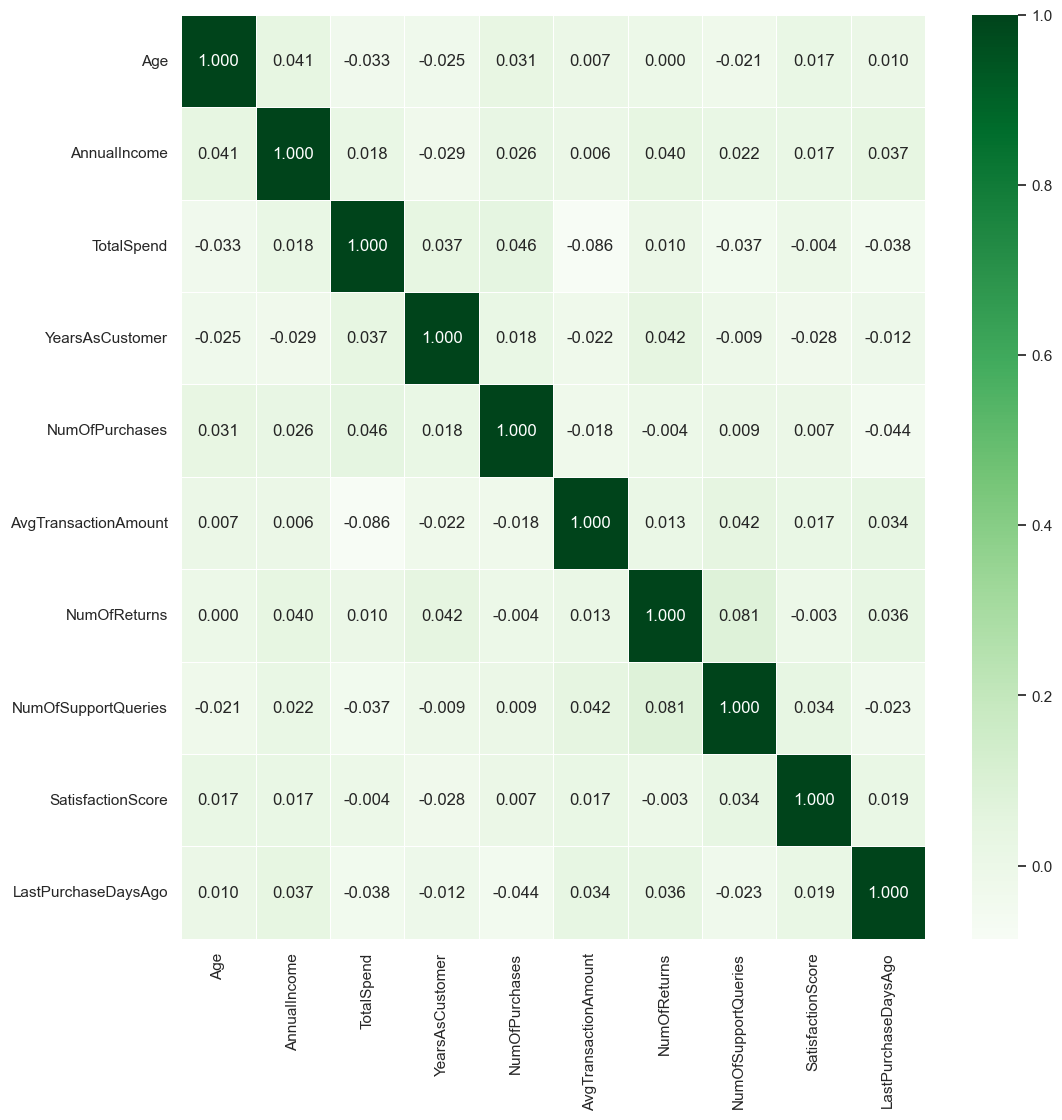

In [403]:
num_data = df1.iloc[:,1:].select_dtypes(include = ["int64","float64"])
sns.set_theme(rc={'figure.figsize':(12,12)})
sns.heatmap(num_data.corr(),annot=True,cmap="Greens",linewidths=0.4,fmt=".3f")

In [404]:
df = df1
df

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


##### Encoding the data to numeric

In [405]:
enc = OneHotEncoder(sparse_output=False)
encoded_data = enc.fit_transform(df1[['Gender', 'EmailOptIn', 'PromotionResponse']])
encoded_df = pd.DataFrame(
    encoded_data,columns= enc.get_feature_names_out(['Gender', 'EmailOptIn', 'PromotionResponse'])
)

encoded_df

,Gender_Female,Gender_Male,Gender_Other,EmailOptIn_False,EmailOptIn_True,PromotionResponse_Ignored,PromotionResponse_Responded,PromotionResponse_Unsubscribed
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
996,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
998,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [406]:
for cols in encoded_df:
    df1[cols] = encoded_df[cols]

df1

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,...,PromotionResponse,Churn,Gender_Female,Gender_Male,Gender_Other,EmailOptIn_False,EmailOptIn_True,PromotionResponse_Ignored,PromotionResponse_Responded,PromotionResponse_Unsubscribed
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,...,Responded,True,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,...,Responded,False,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,...,Responded,True,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,...,Ignored,True,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,...,Unsubscribed,False,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,...,Ignored,False,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,...,Responded,True,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,...,Unsubscribed,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,...,Responded,True,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [407]:
df1 = df1.drop(['Gender', 'EmailOptIn', 'PromotionResponse'], axis = 1)

In [408]:
df1

,CustomerID,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,Churn,Gender_Female,Gender_Male,Gender_Other,EmailOptIn_False,EmailOptIn_True,PromotionResponse_Ignored,PromotionResponse_Responded,PromotionResponse_Unsubscribed
0,1,62,45.15,5892.58,5,22,453.80,2,0,3,129,True,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2,65,79.51,9025.47,13,77,22.90,2,2,3,227,False,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,18,29.19,618.83,13,71,50.53,5,2,2,283,True,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,21,79.63,9110.30,3,33,411.83,5,3,5,226,True,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,5,21,77.66,5390.88,15,43,101.19,3,0,5,242,False,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,143.72,1089.09,2,29,77.75,0,3,2,88,False,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
996,997,19,164.19,3700.24,9,90,34.45,6,4,4,352,True,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
997,998,47,113.31,705.85,17,69,187.37,7,3,1,172,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
998,999,23,72.98,3891.60,7,31,483.80,1,2,5,55,True,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [409]:
df1.dtypes

CustomerID                          int64
Age                                 int64
AnnualIncome                      float64
TotalSpend                        float64
YearsAsCustomer                     int64
NumOfPurchases                      int64
AvgTransactionAmount              float64
NumOfReturns                        int64
NumOfSupportQueries                 int64
SatisfactionScore                   int64
LastPurchaseDaysAgo                 int64
Churn                                bool
Gender_Female                     float64
Gender_Male                       float64
Gender_Other                      float64
EmailOptIn_False                  float64
EmailOptIn_True                   float64
PromotionResponse_Ignored         float64
PromotionResponse_Responded       float64
PromotionResponse_Unsubscribed    float64
dtype: object

In [410]:
df1.isna().sum()

CustomerID                        0
Age                               0
AnnualIncome                      0
TotalSpend                        0
YearsAsCustomer                   0
NumOfPurchases                    0
AvgTransactionAmount              0
NumOfReturns                      0
NumOfSupportQueries               0
SatisfactionScore                 0
LastPurchaseDaysAgo               0
Churn                             0
Gender_Female                     0
Gender_Male                       0
Gender_Other                      0
EmailOptIn_False                  0
EmailOptIn_True                   0
PromotionResponse_Ignored         0
PromotionResponse_Responded       0
PromotionResponse_Unsubscribed    0
dtype: int64

<Axes: >

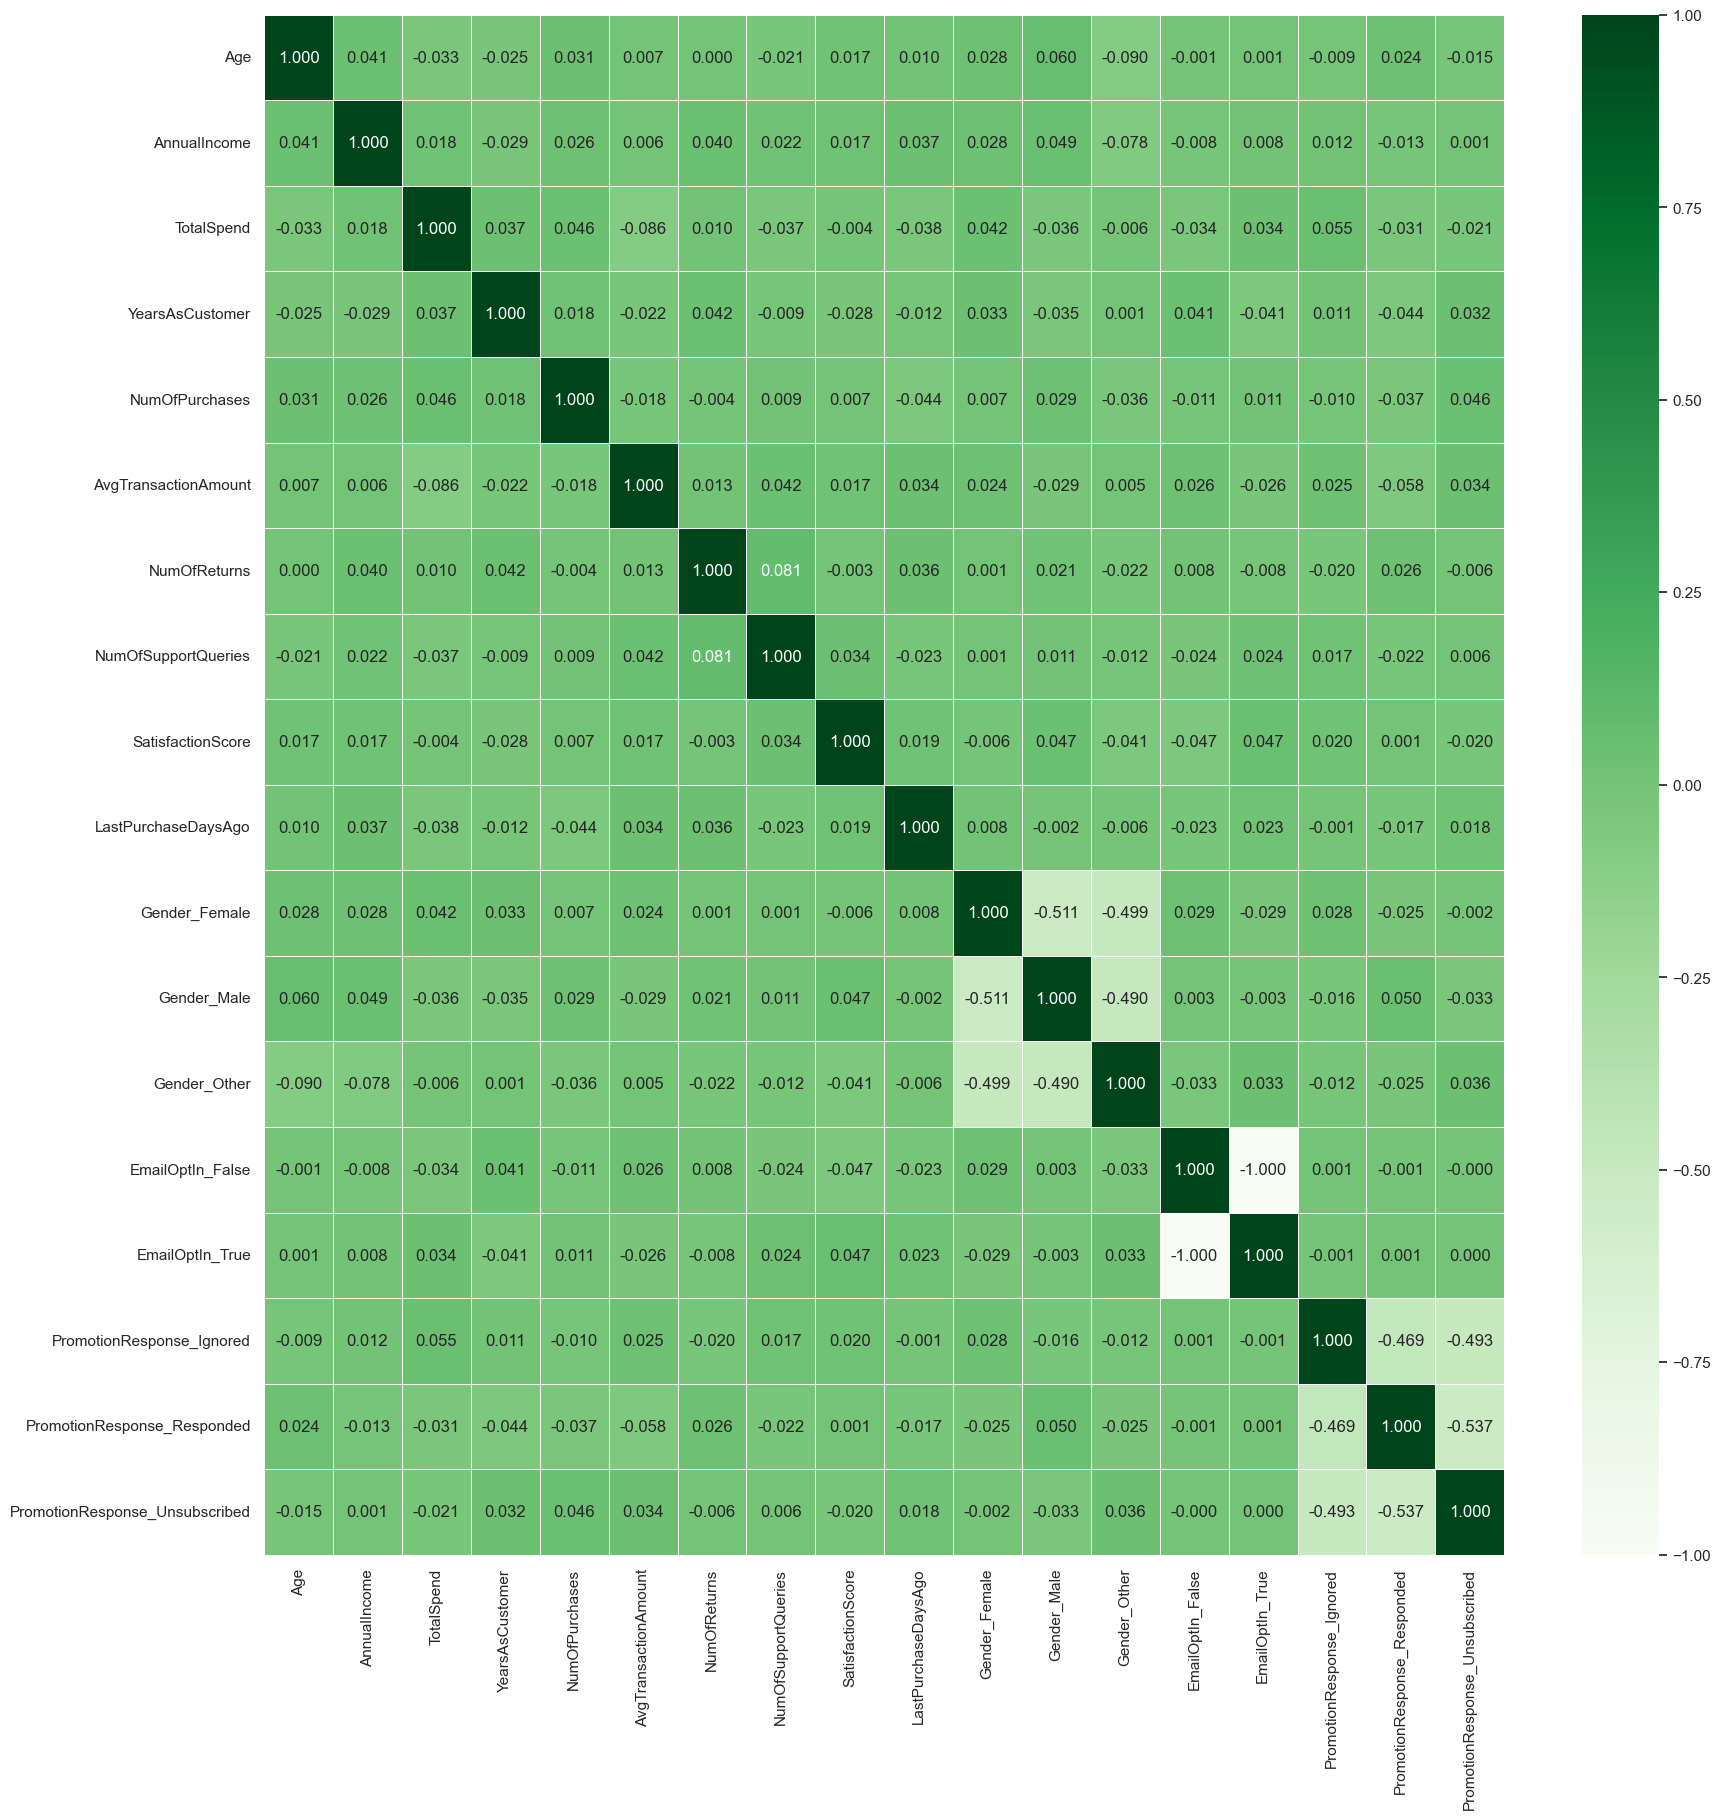

In [411]:
num_data = df1.iloc[:,1:].select_dtypes(include = ["int64","float64"])
sns.set_theme(rc={'figure.figsize':(20,20)})
sns.heatmap(num_data.corr(),annot=True,cmap="Greens",linewidths=0.4,fmt=".3f")

In [412]:
scaled_df = StandardScaler().fit_transform(df1.iloc[:,1:].values) ## CustomeID not needed in Outlier Detection 
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df1.iloc[:,1:].columns
scaled_df

,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,Churn,Gender_Female,Gender_Male,Gender_Other,EmailOptIn_False,EmailOptIn_True,PromotionResponse_Ignored,PromotionResponse_Responded,PromotionResponse_Unsubscribed
0,1.229628,-1.264973,0.283773,-0.854240,-0.962378,1.282050,-0.902114,-1.379444,0.018689,-0.516489,0.949284,-0.720942,-0.708168,1.444444,-0.943588,0.943588,-0.656213,1.399493,-0.751628
1,1.426547,-0.614434,1.378924,0.591480,0.965463,-1.673359,-0.902114,0.047075,0.018689,0.422756,-1.053425,-0.720942,1.412095,-0.692308,1.059784,-1.059784,-0.656213,1.399493,-0.751628
2,-1.658518,-1.567145,-1.559749,0.591480,0.755153,-1.483853,0.134005,0.047075,-0.700136,0.959468,0.949284,-0.720942,1.412095,-0.692308,1.059784,-1.059784,-0.656213,1.399493,-0.751628
3,-1.461599,-0.612162,1.408578,-1.215669,-0.576810,0.994191,0.134005,0.760335,1.456339,0.413172,0.949284,-0.720942,-0.708168,1.444444,-0.943588,0.943588,1.523896,-0.714545,-0.751628
4,-1.461599,-0.649460,0.108396,0.952910,-0.226294,-1.136392,-0.556741,-1.379444,1.456339,0.566518,-1.053425,-0.720942,-0.708168,1.444444,1.059784,-1.059784,-0.656213,-0.714545,1.330445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.704511,0.601258,-1.395363,-1.396384,-0.717017,-1.297160,-1.592861,0.760335,-0.700136,-0.909438,-1.053425,-0.720942,1.412095,-0.692308,-0.943588,0.943588,1.523896,-0.714545,-0.751628
996,-1.592878,0.988817,-0.482594,-0.131380,1.421134,-1.594141,0.479378,1.473594,0.737514,1.620773,0.949284,-0.720942,1.412095,-0.692308,1.059784,-1.059784,-0.656213,1.399493,-0.751628
997,0.245033,0.025504,-1.529330,1.314340,0.685050,-0.545310,0.824751,0.760335,-1.418961,-0.104371,-1.053425,1.387075,-0.708168,-0.692308,-0.943588,0.943588,-0.656213,-0.714545,1.330445
998,-1.330319,-0.738066,-0.415701,-0.492810,-0.646913,1.487810,-1.247487,0.047075,1.456339,-1.225715,0.949284,-0.720942,1.412095,-0.692308,1.059784,-1.059784,-0.656213,1.399493,-0.751628


#### Outlier Detection 

<Axes: >

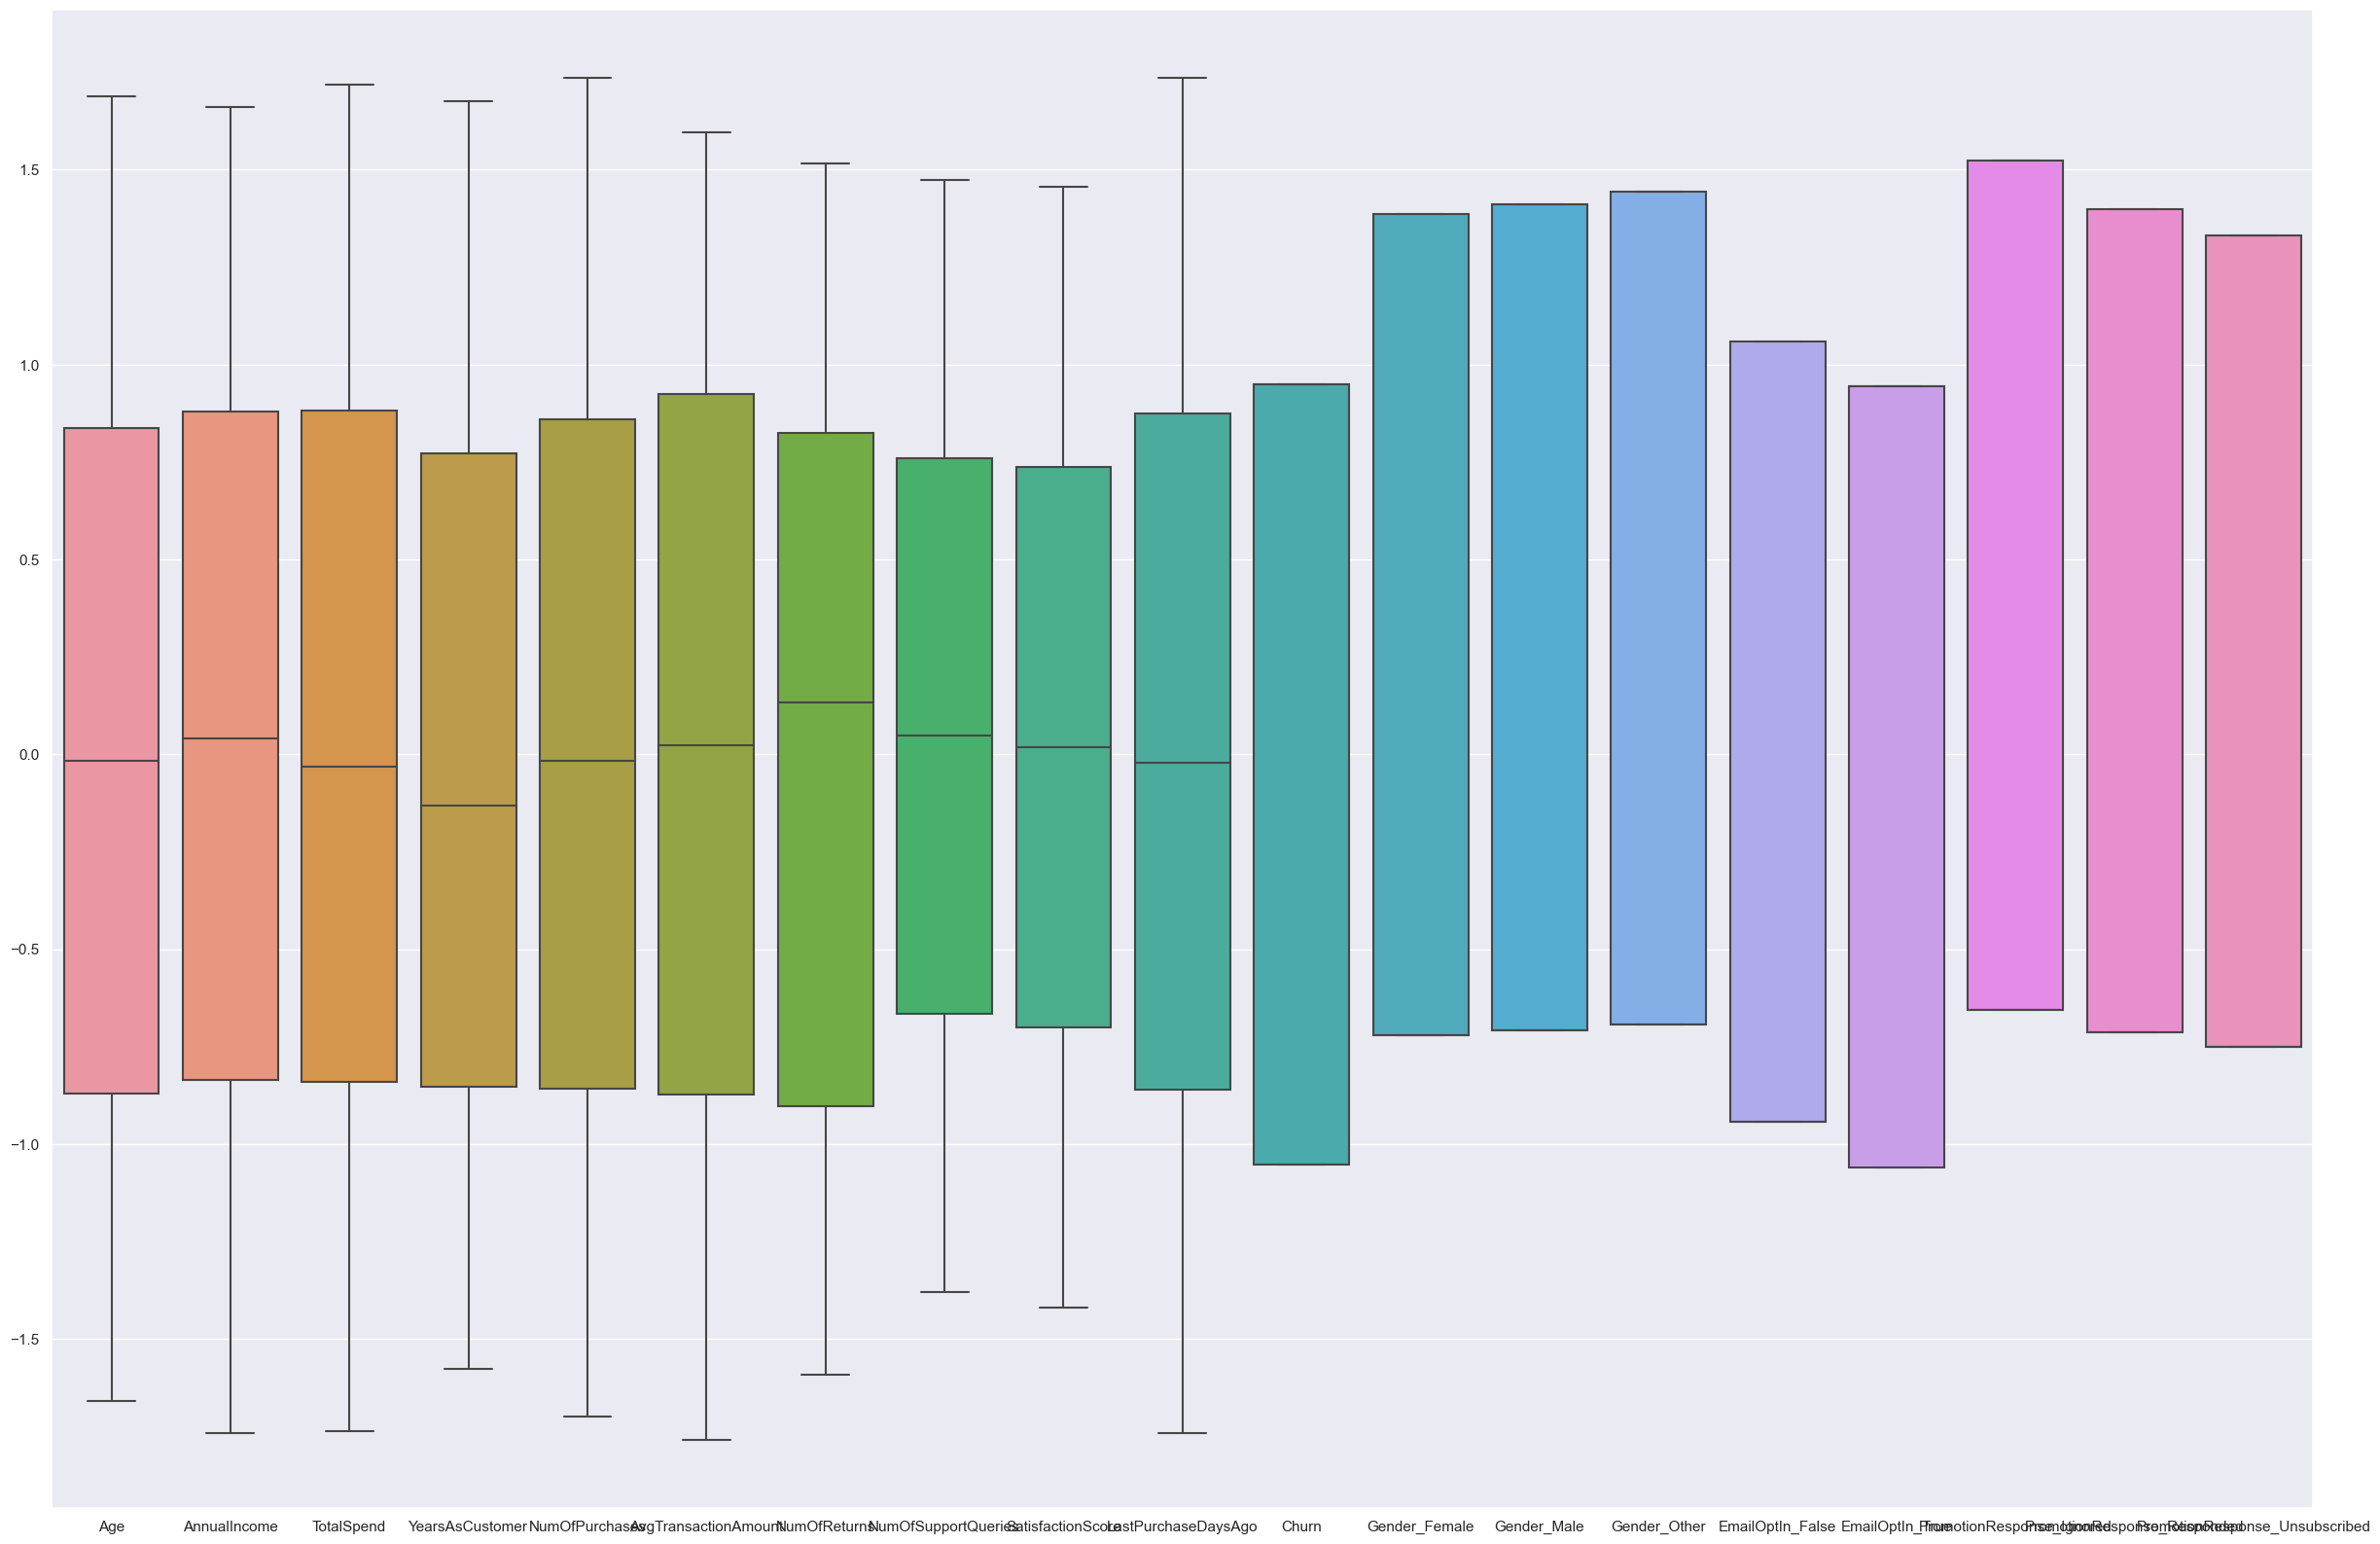

In [413]:
sns.set_theme(rc={'figure.figsize':(30,20)})
sns.boxplot(scaled_df)

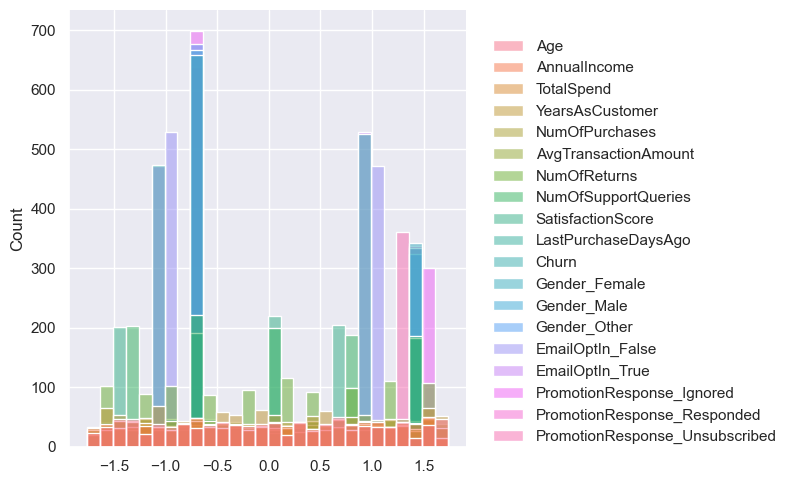

In [414]:
sns.displot(scaled_df)

<Axes: >

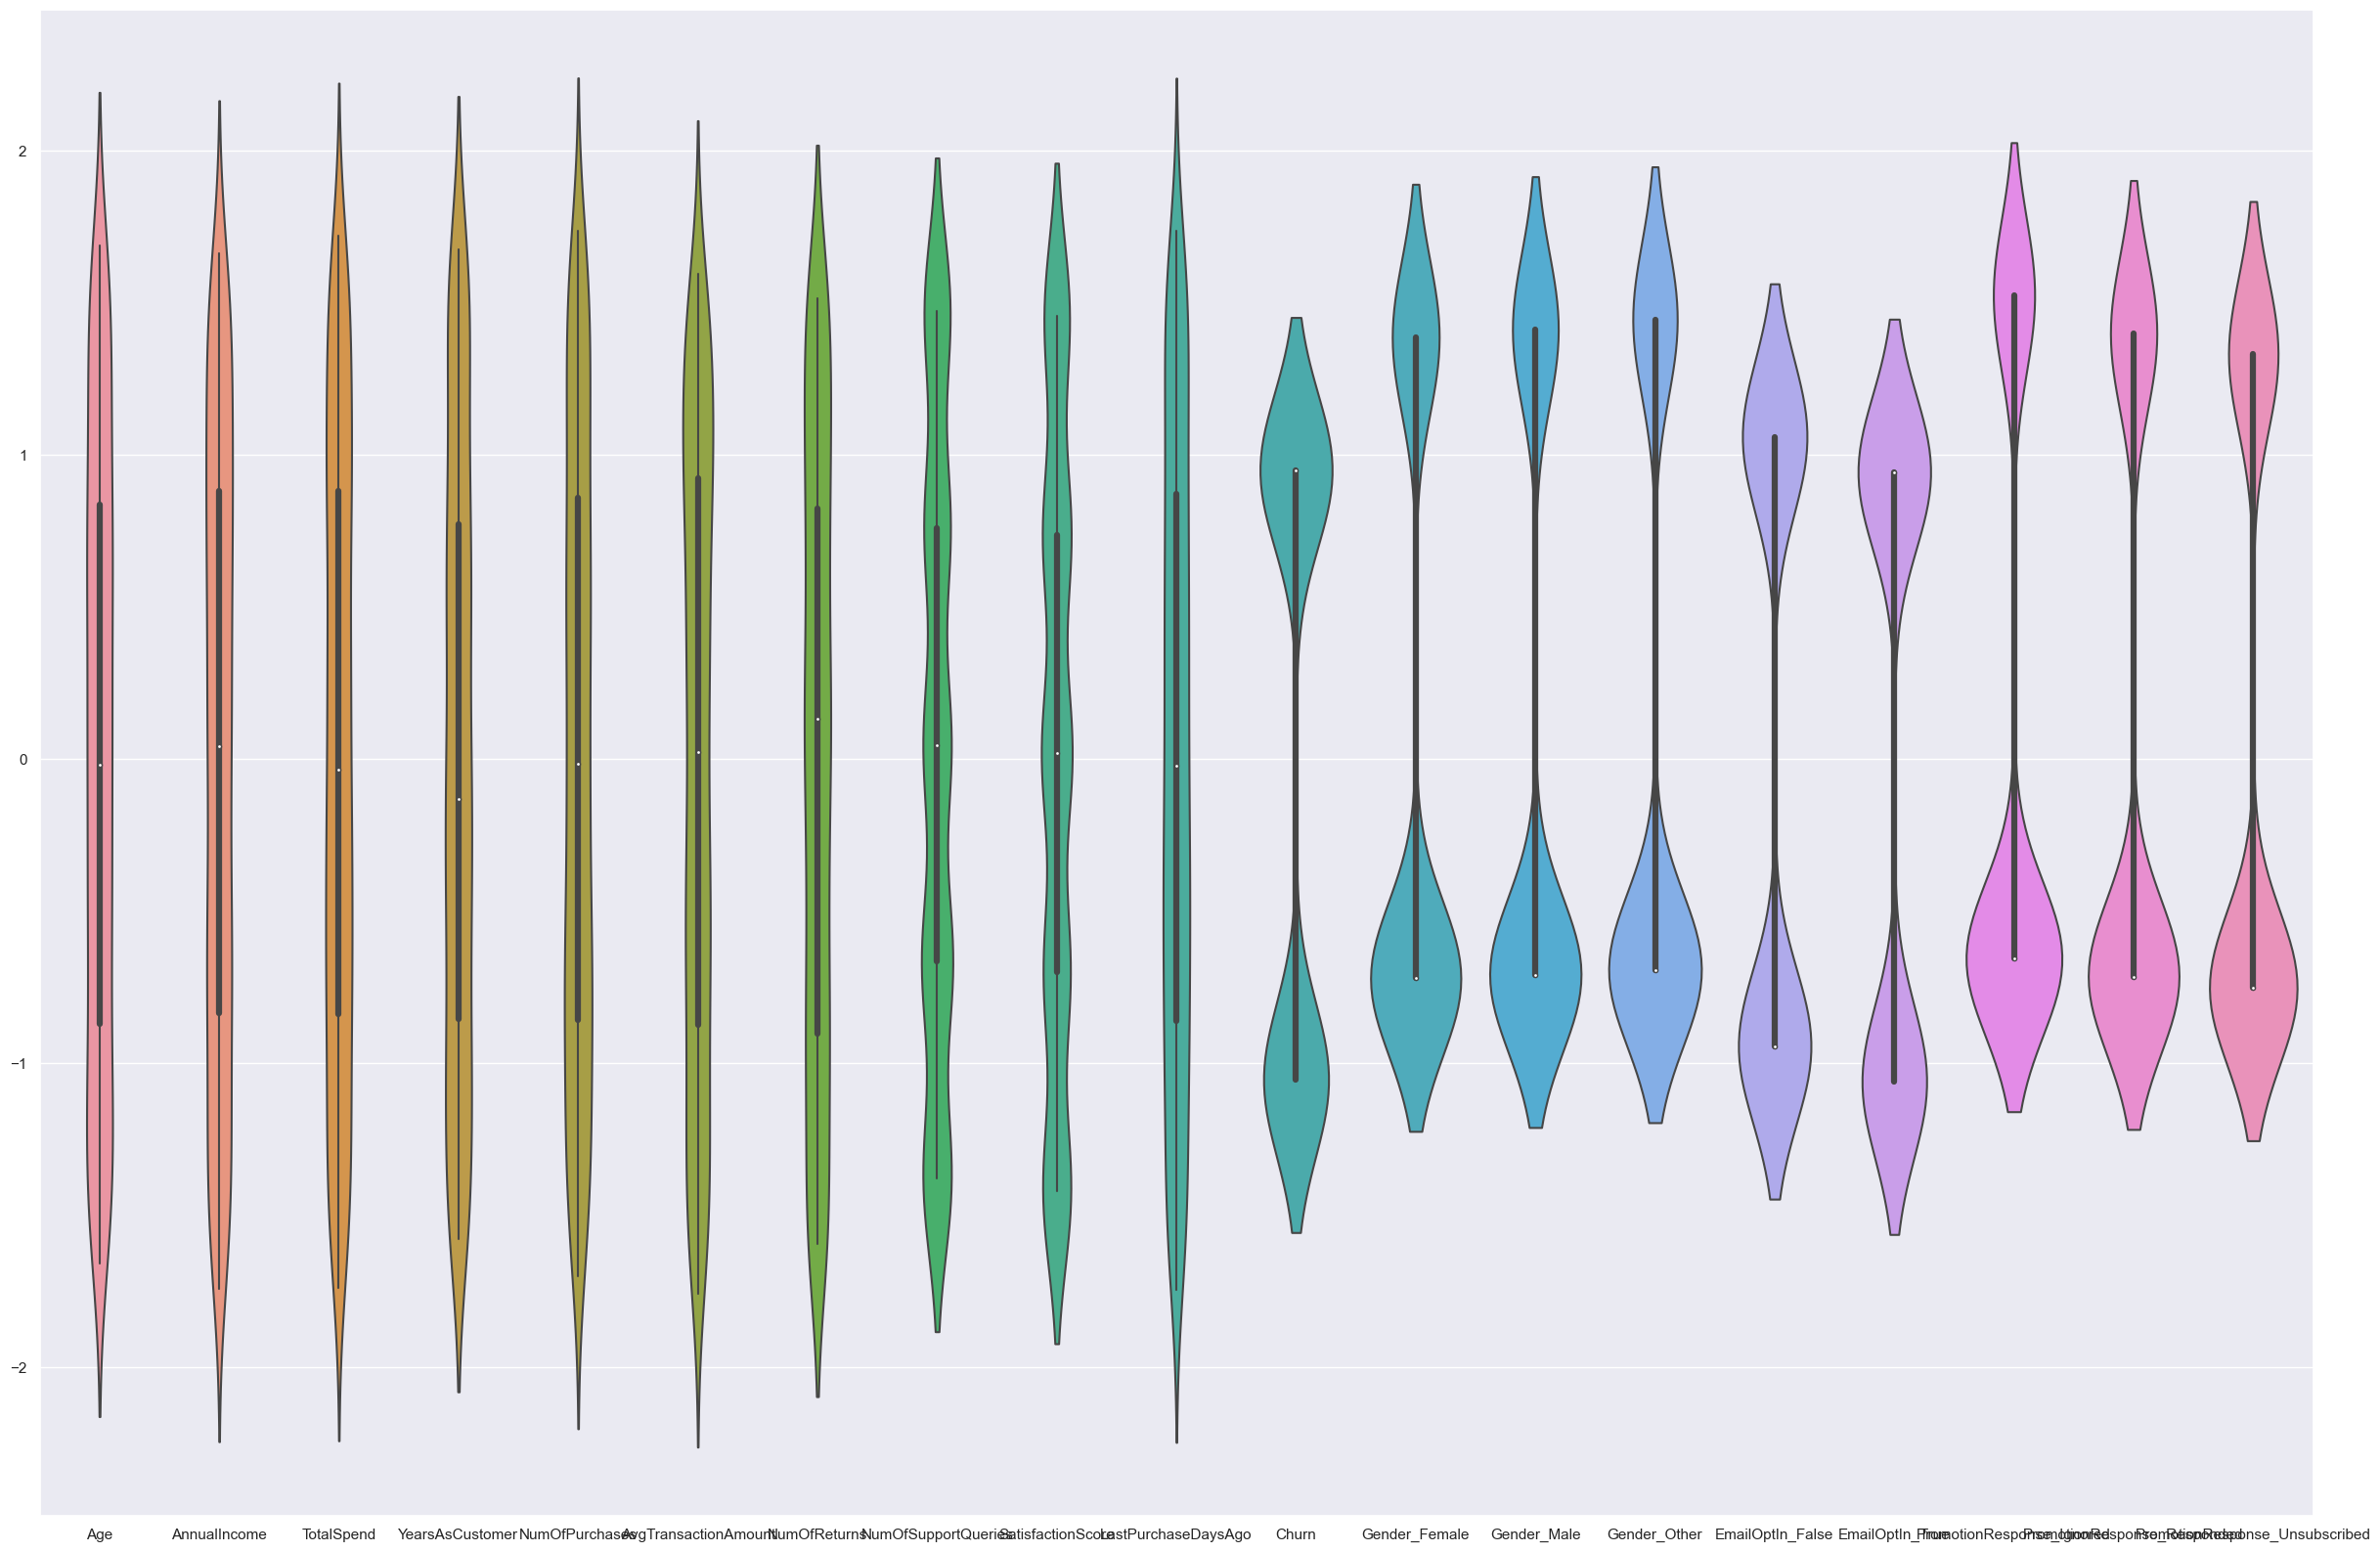

In [415]:
sns.violinplot(scaled_df)

##### Using DBScan

In [416]:
dbscan = DBSCAN(eps = 4,min_samples = 10)
model = dbscan.fit(scaled_df)
labels = model.labels_

# -1 value in anomaly_score column signifies that the data is anomalous
scaled_df["anomaly_score"] = labels
anomalies = scaled_df[scaled_df.anomaly_score == -1]
anomalies.shape

(0, 20)

No outlier detected

#### Train Test Split

In [417]:
train_cols = list(df1.columns)
train_cols.remove('Churn')
train_cols

['CustomerID',
 'Age',
 'AnnualIncome',
 'TotalSpend',
 'YearsAsCustomer',
 'NumOfPurchases',
 'AvgTransactionAmount',
 'NumOfReturns',
 'NumOfSupportQueries',
 'SatisfactionScore',
 'LastPurchaseDaysAgo',
 'Gender_Female',
 'Gender_Male',
 'Gender_Other',
 'EmailOptIn_False',
 'EmailOptIn_True',
 'PromotionResponse_Ignored',
 'PromotionResponse_Responded',
 'PromotionResponse_Unsubscribed']

In [418]:
X = df1[columns := train_cols] # customer id is excluded as it is independent of Churn
y = df1["Churn"] # feature to be predicted
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 20% is for test data

#### Adaboost Classifier with Decision Trees as Base Model

In [419]:
abc = AdaBoostClassifier()
parameters = dict()
parameters["estimator"] = [DecisionTreeClassifier(max_depth=2)]
parameters["algorithm"] = ["SAMME"]
parameters["n_estimators"] = [i for i in range(50,150,25)]
parameters["learning_rate"] = [0.5, 1, 1.5, 2]

##### Using Hyperparametric Tuning

In [420]:
abc_clf = GridSearchCV(abc,param_grid = parameters,n_jobs=-1,cv=5,verbose=3,return_train_score=True,scoring="recall")

##### Fitting the model and Training it

In [421]:
abc_clf.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME'],
                         'estimator': [DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.5, 1, 1.5, 2],
                         'n_estimators': [50, 75, 100, 125]},
             return_train_score=True, scoring='recall', verbose=3)

In [422]:
## best score obtained
abc_clf.best_score_

0.6023809523809525

In [423]:
abc_clf = abc_clf.best_estimator_

In [424]:
abc_clf.get_params

<bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5)>

In [425]:
## score on training set
abc_clf.score(X_train,y_train)

0.61

#### Testing the model

In [426]:
## score on test set
abc_clf.score(X_test,y_test)

0.55

#### Classification Report

In [427]:
## on train data
print(classification_report(y_train,abc_clf.predict(X_train),target_names=("Not Churn","Churn"),digits=3))

              precision    recall  f1-score   support

   Not Churn      0.736     0.279     0.405       380
       Churn      0.582     0.910     0.710       420

    accuracy                          0.610       800
   macro avg      0.659     0.594     0.557       800
weighted avg      0.655     0.610     0.565       800



In [428]:
## on test data
print(classification_report(y_test,abc_clf.predict(X_test),target_names=("Not Churn","Churn"),digits=3))

              precision    recall  f1-score   support

   Not Churn      0.559     0.202     0.297        94
       Churn      0.548     0.858     0.669       106

    accuracy                          0.550       200
   macro avg      0.554     0.530     0.483       200
weighted avg      0.553     0.550     0.494       200



In [429]:
## confusion matrix for train data
confusion_matrix(y_train,abc_clf.predict(X_train))

array([[106, 274],
       [ 38, 382]], dtype=int64)

In [430]:
## confusion matrix for test data
confusion_matrix(y_test,abc_clf.predict(X_test))

array([[19, 75],
       [15, 91]], dtype=int64)

In [431]:
## accuracy, precision, recall, f1-score
print("accuracy is ",abc_clf.score(X_test,y_test))
print("precision is ",precision_score(y_test,abc_clf.predict(X_test)))
print("recall is ",recall_score(y_test,abc_clf.predict(X_test)))
print("F1 score is ",f1_score(y_test,abc_clf.predict(X_test)))


accuracy is  0.55
precision is  0.5481927710843374
recall is  0.8584905660377359
F1 score is  0.6691176470588236


### Random Forest Classifier

In [444]:
rfc = RandomForestClassifier()
parameters = dict()
parameters["n_estimators"] = [i for i in range(50,250,25)]
parameters["criterion"] = ["gini"]
parameters["max_features"] = ["log2","sqrt"]
parameters['max_depth'] = [2,3]
parameters['oob_score'] = [True,False]
parameters['random_state'] = [42]
rfc_clf = GridSearchCV(rfc,param_grid=parameters,n_jobs=-1,verbose=3,return_train_score=True,cv=4,scoring="recall")

In [445]:
## data fitted in classification model where the train  test split is as in the previous model
rfc_clf.fit(X_train,y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225],
                         'oob_score': [True, False], 'random_state': [42]},
             return_train_score=True, scoring='recall', verbose=3)

In [446]:
rfc_clf.best_score_

0.8880952380952382

In [447]:
rfc_clf=rfc_clf.best_estimator_

In [448]:
rfc_clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=2, max_features='log2', n_estimators=225,
                       oob_score=True, random_state=42)>

In [449]:
## score on train set
rfc_clf.score(X_train,y_train)

0.5825

#### Testing the model

In [450]:
## score on test data
rfc_clf.score(X_test,y_test)

0.545

#### Classification Report

In [451]:
## on train data
print(classification_report(y_train,rfc_clf.predict(X_train),target_names=("Not Churn","Churn"),digits=3))

              precision    recall  f1-score   support

   Not Churn      0.795     0.163     0.271       380
       Churn      0.560     0.962     0.708       420

    accuracy                          0.583       800
   macro avg      0.677     0.563     0.489       800
weighted avg      0.671     0.583     0.500       800



In [452]:
## on test data
print(classification_report(y_test,rfc_clf.predict(X_test),target_names=("Not Churn","Churn"),digits=3))

              precision    recall  f1-score   support

   Not Churn      0.588     0.106     0.180        94
       Churn      0.541     0.934     0.685       106

    accuracy                          0.545       200
   macro avg      0.565     0.520     0.433       200
weighted avg      0.563     0.545     0.448       200



In [453]:
## confusion matrix for train data
confusion_matrix(y_train,rfc_clf.predict(X_train))

array([[ 62, 318],
       [ 16, 404]], dtype=int64)

In [454]:
## confusion matrix for test data
confusion_matrix(y_test,rfc_clf.predict(X_test))

array([[10, 84],
       [ 7, 99]], dtype=int64)

In [455]:
## accuracy, precision, recall, f1-score
print("accuracy is ",rfc_clf.score(X_test,y_test))
print("precision is ",precision_score(y_test,rfc_clf.predict(X_test)))
print("recall is ",recall_score(y_test,rfc_clf.predict(X_test)))
print("F1 score is ",f1_score(y_test,rfc_clf.predict(X_test)))

accuracy is  0.545
precision is  0.5409836065573771
recall is  0.9339622641509434


F1 score is  0.6851211072664359
